In [1]:
import pandas as pd
import ast
import glob
import os
import pprint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dictionaries from the files
a_list = []
#path = '/app/src/files/'
path = '/app/Results/'
def process_your_file(file):
    f1 = open(file, 'r')
    return ast.literal_eval(f1.read())
a_list = [ process_your_file(file) for file in glob.glob(os.path.join(path, '*.txt')) ]

In [3]:
# Convert each dictionary to dataframe
df, dftt = pd.DataFrame(), pd.DataFrame()
for xd in a_list:
    dftt = df
    dft1 = {(k1, k2):v2 for k1,v1 in xd.items() 
                               for k2,v2 in xd[k1].items()
                               }
    dft2 = {(k1, k2):v2 for k1,v1 in dft1.items() 
                               for k2,v2 in dft1[k1].items()
                               }
    dft3 = {(k1, k2):v2 for k1,v1 in dft2.items() 
                               for k2,v2 in dft2[k1].items()
                               }
    dft = pd.DataFrame([dft3[i] for i in sorted(dft3)],
                  index = pd.MultiIndex.from_tuples([(k1, k2, k3, k4) for (((k1, k2),k3),k4) in dft3.keys()])
                 )   
    dft.sort_index()
    dft = dft.rename_axis(['SearchTerm','Area','Salary','ZipCode'])
    df = pd.concat([dft, dftt], sort=True)
    df.fillna(0,inplace=True)
    df.sort_index()
#    dft.drop
#    dftt.drop
#column_list = [_ for _ in df.columns]
#column_list
df.columns = df.columns.str.lower()
df.head()

.net  \
SearchTerm                          Area                   Salary ZipCode         
software quality assurance engineer San Francisco Bay Area 150000 95032     0.0   
                                                                  95054     0.0   
                                                                  94010     0.0   
                                                                  94536     0.0   
                                                                  94539     0.0   

                                                                           bayesian  \
SearchTerm                          Area                   Salary ZipCode             
software quality assurance engineer San Francisco Bay Area 150000 95032         0.0   
                                                                  95054         0.0   
                                                                  94010         0.0   
                                                                  94536         0.0   
                                                                  94539         0.0   

                                                                           c/c++  \
SearchTerm                          Area                   Salary ZipCode          
software quality assurance engineer San Francisco Bay Area 150000 95032      1.0   
                                                                  95054      1.0   
                                                                  94010      1.0   
                                                                  94536      1.0   
                                                                  94539      1.0   

                                                                           confluence  \
SearchTerm                          Area                   Salary ZipCode               
software quality assurance engineer San Francisco Bay Area 150000 95032           0.0   
                                                                  95054           0.0   
                                                                  94010           0.0   
                                                                  94536           0.0   
                                                                  94539           0.0   

                                                                           etl  \
SearchTerm                          Area                   Salary ZipCode        
software quality assurance engineer San Francisco Bay Area 150000 95032    1.0   
                                                                  95054    1.0   
                                                                  94010    1.0   
                                                                  94536    1.0   
                                                                  94539    1.0   

                                                                           economics  \
SearchTerm                          Area                   Salary ZipCode              
software quality assurance engineer San Francisco Bay Area 150000 95032          0.0   
                                                                  95054          0.0   
                                                                  94010          0.0   
                                                                  94536          0.0   
                                                                  94539          0.0   

                                                                           elastic  \
SearchTerm                          Area                   Salary ZipCode            
software quality assurance engineer San Francisco Bay Area 150000 95032        0.0   
                                                                  95054        0.0   
                                                                  94010        0.0   
                                                

In [4]:
#column_list = [_ for _ in df.columns]
#column_list

In [5]:
# Merge duplicates and drop non-specific columns
df['visualization'] += df.pop('visualizations')
df['scripting'] += df.pop('scripts')
df['git'] +=df.pop('github')
df['api'] +=df.pop('apis')
#df['machine'] +=df.pop('learning')
df['networking'] +=df.pop('network')
df.rename(columns={'machine': 'Machine learning'}, inplace=True)
df.rename(columns={'big': 'big data'}, inplace=True)
df.columns = df.columns.str.capitalize()

# __Software Quality Assurance Engineer - Skill demand__ 

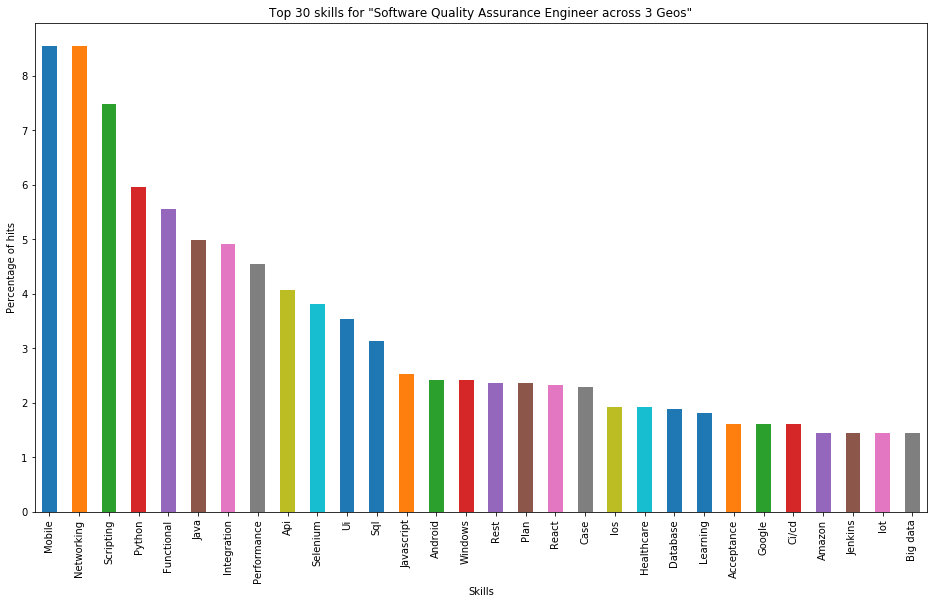

In [6]:
# Top 30 skills for Software Quality Assurance Engineer
sqae = df.iloc[df.index.get_level_values('SearchTerm') == 'software quality assurance engineer'].sum().sort_values(ascending=False).nlargest(30)
sqae_per = sqae*100/sqae.sum()
ax= sqae_per.plot(figsize=(16,9),title='Top 30 skills for "Software Quality Assurance Engineer across 3 Geos"', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

#### Inference - Software Quality Assurance Engineer across 3 Geos (SF, AZ, MA)
* Python seems to be the 4th highest in-demand skill
* Networking and Mobile seems to be the most in-demand skill for this profile
* "Case" typically refers to "test case" in software qa

The program does not parse on phrases and therefore it is unknown if the results reflect the typical usage of these two skill words


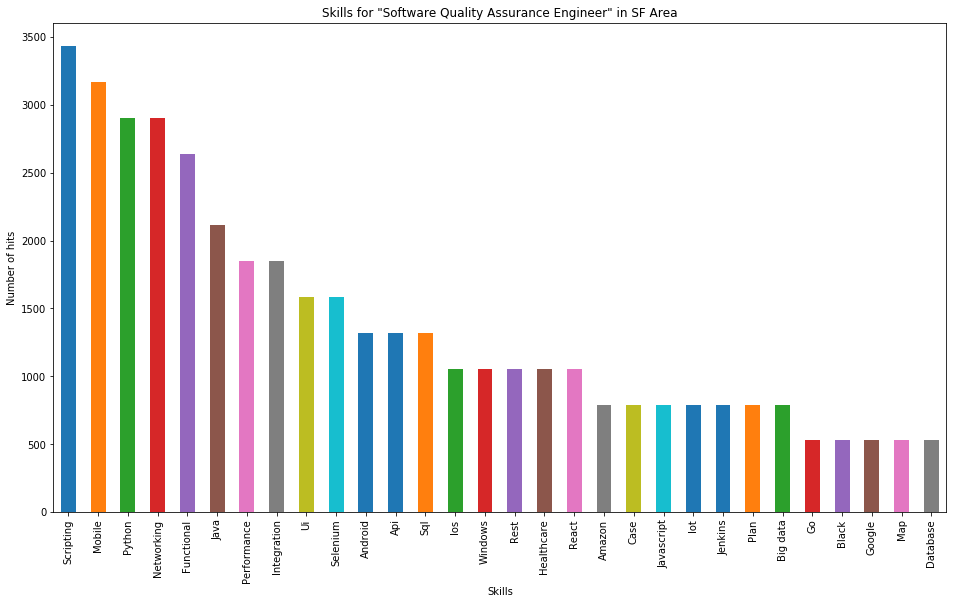

In [7]:
# Top skills for Software Quality Assurance Engineer in SF Area
# https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe
df.sort_index()
sqae_sf = df.loc[pd.IndexSlice[('software quality assurance engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(30)
#sqae_sf_per = sqae_sf*100/sqae_sf.sum()
ax= sqae_sf.plot(figsize=(16,9),title='Skills for "Software Quality Assurance Engineer" in SF Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Number of hits')
plt.show()

#### Inference - Software Quality Assurance Engineer in SF area
* "Android" seems to be a preferred skillset over "iOS"
* "Map" typically refers to "Map Reduce"
* The layered data seems to be caused by the less number of overall jobs (119)

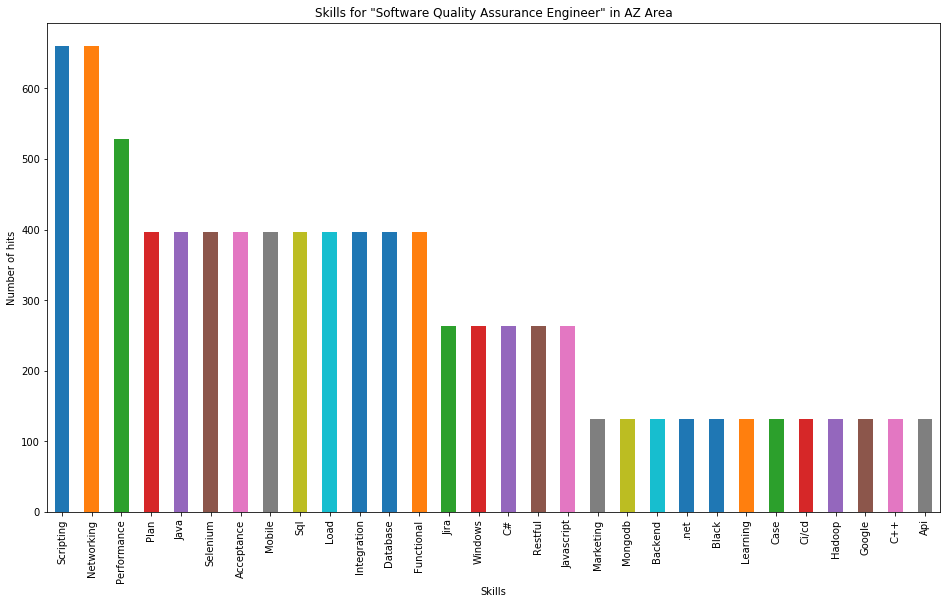

In [8]:
# Top skills for Software Quality Assurance Engineer in AZ Area
# https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe
df.sort_index()
sqae_az = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(30)
#sqae_az_per = sqae_az*100/sqae_az.sum()
ax= sqae_az.plot(figsize=(16,9),title='Skills for "Software Quality Assurance Engineer" in AZ Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Number of hits')
plt.show()

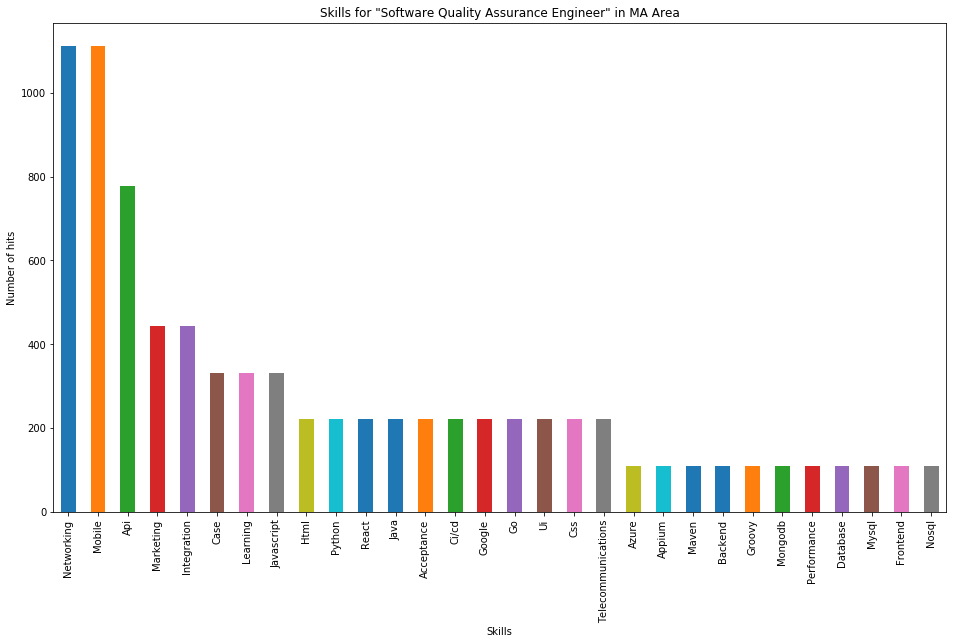

In [9]:
# Top skills for Software Quality Assurance Engineer in MA Area
# https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe
df.sort_index()
sqae_ma = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Sufolk County, Boston MA')]].sum().sort_values(ascending=False).nlargest(30)
#sqae_ma_per = sqae_ma*100/sqae_ma.sum()
ax= sqae_ma.plot(figsize=(16,9),title='Skills for "Software Quality Assurance Engineer" in MA Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Number of hits')
plt.show()

# __Data Science Engineer - Skill demand__ 

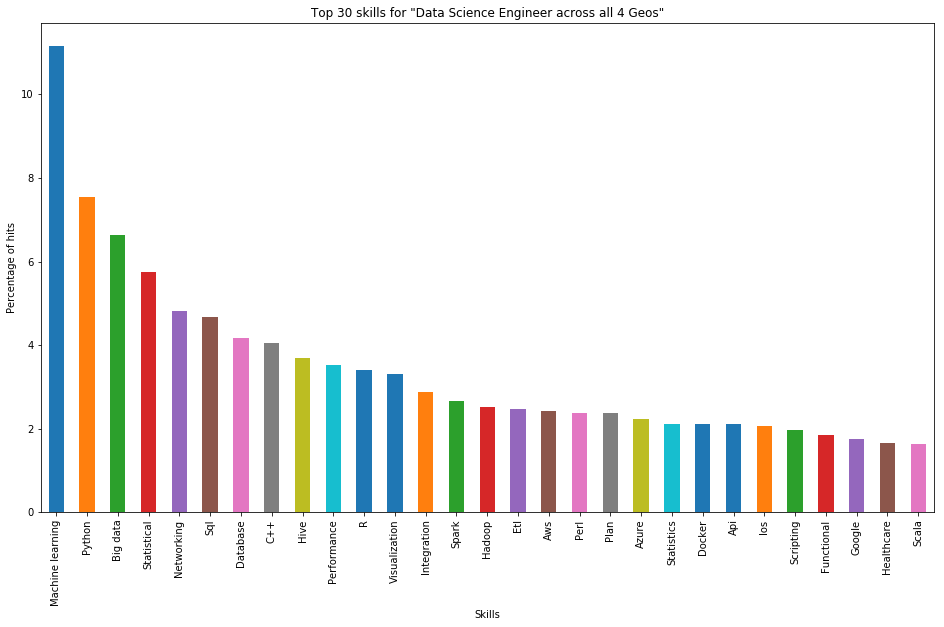

In [10]:
# Top 30 skills for Data Science Engineer
dse = df.iloc[df.index.get_level_values('SearchTerm') == 'data science engineer'].sum().sort_values(ascending=False).nlargest(30)
dse.drop(index=['Learning'], inplace=True)
dse_per = dse*100/dse.sum()
ax= dse_per.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer across all 4 Geos"', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

#### Inference- Data Science Engineer across 4 Geos (SF, AZ, MA, TX)
* Machine learning seems to be the most in-demand skill followed by python.
* Demand for Python seems to be almost double the demand for R as a data science language

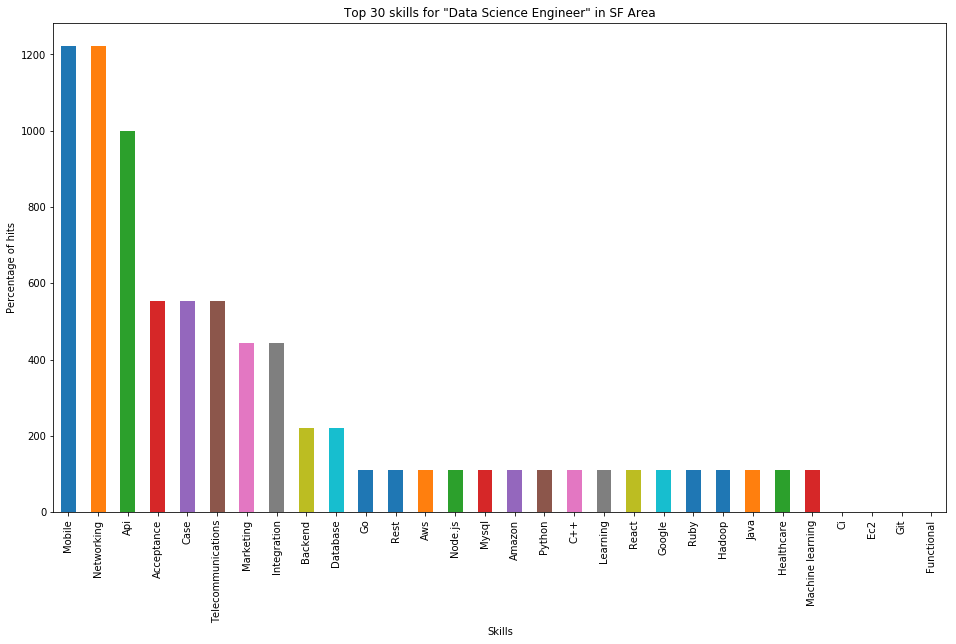

In [11]:
# Top skills for Data Science Engineer in SF Area
df.sort_index()
dse_sf = df.loc[pd.IndexSlice[('data science engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(30)
#dse_sf_per = dse_sf*100/dse_sf.sum()
ax= dse_sf.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer" in SF Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

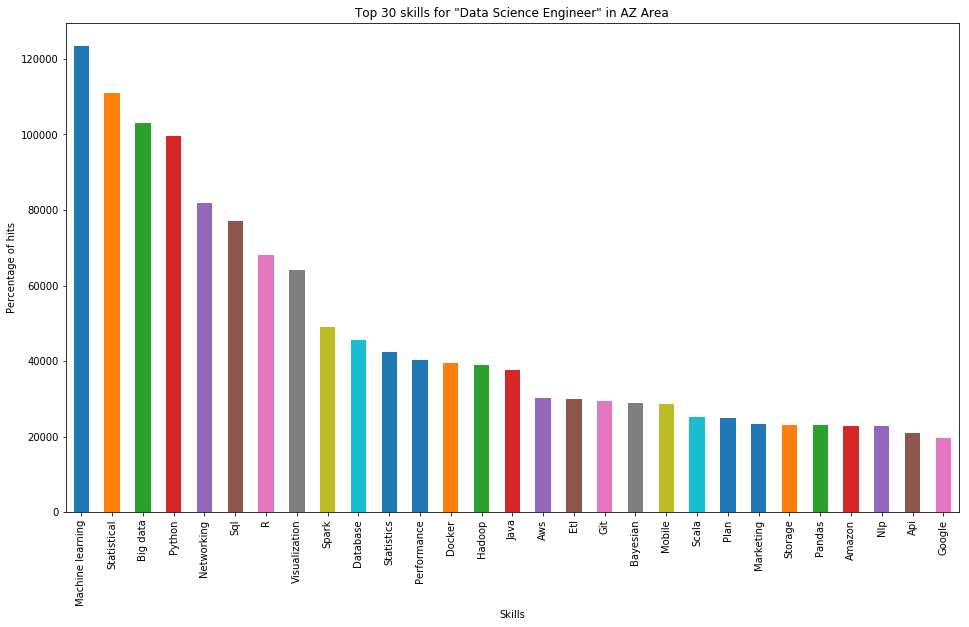

In [12]:
# Top skills for Data Science Engineer in AZ Area
df.sort_index()
dse_az = df.loc[pd.IndexSlice[('data science engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(30)
#dse_az_per = dse_az*100/dse_az.sum()
dse_az.drop(index=['Learning'], inplace=True)
ax= dse_az.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer" in AZ Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

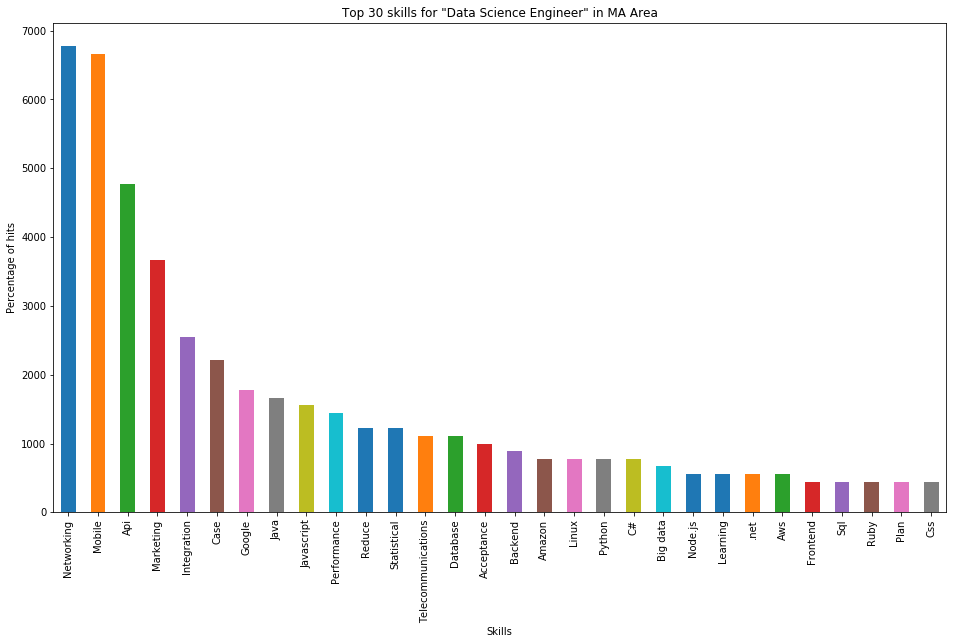

In [13]:
# Top skills for Data Science Engineer in MA Area
df.sort_index()
dse_ma = df.loc[pd.IndexSlice[('data science engineer', 'Sufolk County, Boston MA')]].sum().sort_values(ascending=False).nlargest(30)
#dse_ma_per = dse_ma*100/dse_ma.sum()
ax= dse_ma.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer" in MA Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

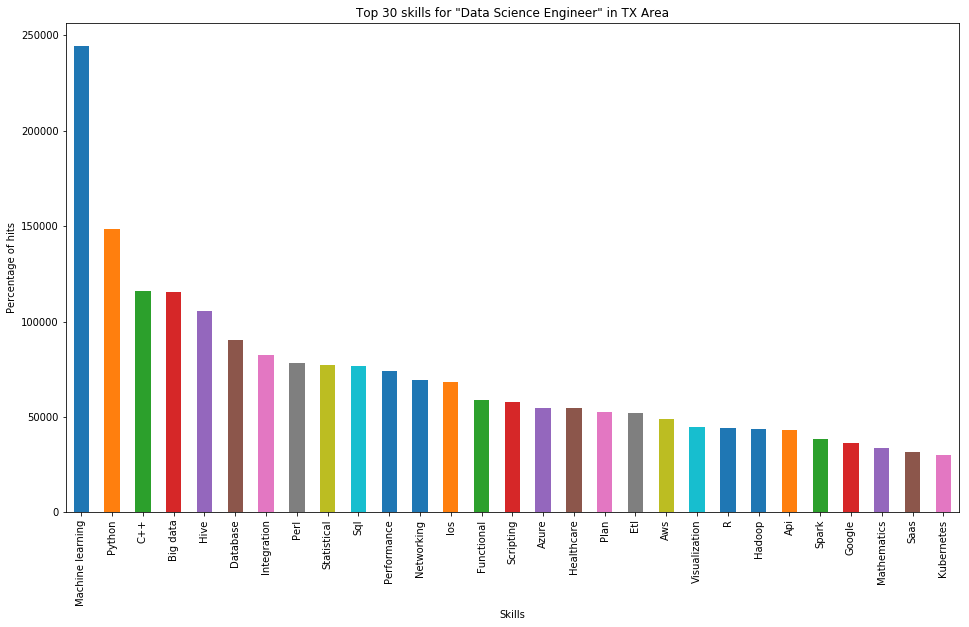

In [14]:
# Top skills for Data Science Engineer in TX Area
df.sort_index()
dse_tx = df.loc[pd.IndexSlice[('data science engineer', 'Travis County, Austin TX')]].sum().sort_values(ascending=False).nlargest(30)
#dse_tx_per = dse_tx*100/dse_tx.sum()
dse_tx.drop(index=['Learning'], inplace=True)
ax= dse_tx.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer" in TX Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

# __Comparison between Geos__

In [15]:
dse_top_skills = list(dse.head(30).index)

In [18]:
# Get the geo specific values for the top 15 dse skills
dse_az_15 = df.loc[pd.IndexSlice[('data science engineer', 'Phoenix, AZ')], dse_top_skills].sum()
#dse_az_15.drop(index=['Learning'], inplace=True)
dse_az_15 = dse_az_15*100/dse_az_15.sum()

dse_sf_15 = df.loc[pd.IndexSlice[('data science engineer', 'San Francisco Bay Area')], dse_top_skills].sum()
#dse_sf_15.drop(index=['Learning'], inplace=True)
dse_sf_15 = dse_sf_15*100/dse_sf_15.sum()

dse_ma_15 = df.loc[pd.IndexSlice[('data science engineer', 'Sufolk County, Boston MA')], dse_top_skills].sum()
#dse_ma_15.drop(index=['Learning'], inplace=True)
dse_ma_15 = dse_ma_15*100/dse_ma_15.sum()

dse_tx_15 = df.loc[pd.IndexSlice[('data science engineer', 'Travis County, Austin TX')], dse_top_skills].sum()
#dse_tx_15.drop(index=['Learning'], inplace=True)
dse_tx_15 = dse_tx_15*100/dse_tx_15.sum()

#dse_sf_15

## Data Science Engineer - Comparison between AZ and TX

In [ ]:
df_dse_cp_15_az_tx = pd.concat([dse_az_15, dse_tx_15], ignore_index=False, axis = 1)
df_dse_cp_15_az_tx.columns = ['Arizona','Austin']
df_dse_cp_15_az_tx.sort_values(by=['Arizona','Austin'], ascending=False, inplace=True)
xy = df_dse_cp_15_az_tx.plot(figsize=(20,10), kind='bar', title='Comparison of top 15 skills for "Data Science Engineer - AZ, TX', grid=False, width=0.8)
xy.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

## Data Science Engineer - Comparison between SF and MA

In [ ]:
# Plot of the skill requirement for data science engineer across geos for top 15
df_dse_cp_15_sf_ma = pd.concat([dse_sf_15, dse_ma_15], ignore_index=False, axis = 1)
df_dse_cp_15_sf_ma.columns = ['San Francisco','Boston']
df_dse_cp_15_sf_ma.sort_values(by=['San Francisco', 'Boston'], ascending=False, inplace=True)
xy = df_dse_cp_15_sf_ma.plot(figsize=(20,10), kind='bar', title='Comparison of top 15 skills for "Data Science Engineer - SF, MA', grid=False, width=0.8)
xy.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

In [ ]:
# Plot of the skill requirement for data science engineer across 4 geos for top 15
df_dse_cp_15 = pd.concat([dse_az_15, dse_tx_15, dse_sf_15, dse_ma_15], ignore_index=False, axis = 1)
df_dse_cp_15.columns = ['Arizona', 'Austin', 'San Francisco','Boston']
df_dse_cp_15.sort_values(by=['Arizona', 'Austin','San Francisco', 'Boston'], ascending=False, inplace=True)
df_dse_cp_15.drop(index=['Networking', 'Api', 'Integration'], inplace=True)
xy = df_dse_cp_15.plot(figsize=(30,10), kind='bar', title='Comparison of top 15 skills for "Data Science Engineer - AZ, TX, SF, MA', grid=False, width=0.8)
xy.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

#### Inference - Data science Engineer across 4 geos
* Machine learning and python seem to consistently in high demand across the 4 geos
* As a general trend Python seems to be in higher demand than R

In [ ]:
df_dse_cp_15

In [ ]:
# Compare the SQAE skills by Geo
#df.sort_index()
#sqae_az = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(10)
#sqae_az_per = sqae_az*100/sqae_az.sum()

#sqae_sf = df.loc[pd.IndexSlice[('software quality assurance engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(10)
#sqae_sf_per = sqae_sf*100/sqae_sf.sum()

#sqae_ma = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Sufolk County, Boston MA')]].sum().sort_values(ascending=False).nlargest(10)
#sqae_ma_per = sqae_ma*100/sqae_ma.sum()

#sqae_tx = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Travis County, Austin TX')]].sum().sort_values(ascending=False).nlargest(10)
#sqae_tx_per = sqae_tx*100/sqae_tx.sum()

In [ ]:
# Plot of the skill requirement for software quality assurance engineer across geos
#df_sqae_cp = pd.concat([sqae_sf_per, sqae_az_per, sqae_ma_per], ignore_index=False, sort=True, axis = 1)
#df_sqae_cp.columns = ['San Francisco', 'Arizona', 'Boston']
#df_sqae_cp= df_sqae_cp.replace(0,None)
#df_sqae_cp=df_sqae_cp.dropna(how='all',axis=0)
#df_sqae_cp.fillna(0, inplace=True)
#xy = df_sqae_cp.plot(figsize=(20,10), kind='bar', title='Comparison of top 10 skills for "Software Quality Assurance Engineer" across geos', grid=False, width=0.8)
#xy.set(xlabel='Skills',ylabel='Percentage of hits')
#plt.show()